Packages

In [1]:
#pip install wfdb
#!pip install pydot

In [2]:
#pip install tensorflow-addons
#!pip install graphviz

Modules

In [3]:
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_addons as tfa
print(tf.__version__)
from tensorflow.keras.callbacks import EarlyStopping

2.10.0


C:\Users\Yasuk3\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# ECG Segmentation

In [4]:
# Get the ECG signal and sampling frequency
record30 = wfdb.rdrecord('30', pn_dir='sddb')
ecg_signal30 = record30.p_signal[:, 0]
ecg_signal30_c1 = record30.p_signal[:, 1]
fs = record30.fs 

# Define the start and end time of the VF and normal segment
start_time_vf30 = "07:54:33"
end_time_vf30 = "08:05:47"
start_time_nonvf30 = "00:13:02"
end_time_nonvf30 = "00:33:31"


# Convert the start and end time to sample indices
start_vf_sample30 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf30.split(':'))) * fs)
end_vf_sample30 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf30.split(':'))) * fs)
start_nonvf_sample30 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf30.split(':'))) * fs)
end_nonvf_sample30 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf30.split(':'))) * fs)

# Extract the required segments
vf_segment30 = ecg_signal30[start_vf_sample30:end_vf_sample30]
vf_segment_c130 = ecg_signal30_c1[start_vf_sample30:end_vf_sample30]
nonvf_segment30 = ecg_signal30[start_nonvf_sample30:end_nonvf_sample30]

# Split the ECG segment into smaller segments of 10 seconds
segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf30 = len(vf_segment30) // segment_length
num_segment_vf_c130 = len(vf_segment_c130) // segment_length
num_segments_nonvf30 = len(nonvf_segment30) // segment_length


#Create segments
vf_segments30 = [vf_segment30[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf30)]
nonvf_segments30 = [nonvf_segment30[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf30)]
vf_segments_c130 = [vf_segment_c130[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c130)]

In [5]:
record31 = wfdb.rdrecord('31', pn_dir='sddb')
ecg_signal31 = record31.p_signal[:, 0]
ecg_signal31_c1 = record31.p_signal[:, 1]

start_time_vf31 = "13:42:24"
end_time_vf31 = "13:58:40"
start_time_nonvf31 = "00:01:31"
end_time_nonvf31 = "02:06:29"


start_vf_sample31 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf31.split(':'))) * fs)
end_vf_sample31 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf31.split(':'))) * fs)
start_nonvf_sample31 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf31.split(':'))) * fs)
end_nonvf_sample31 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf31.split(':'))) * fs)


vf_segment31 = ecg_signal31[start_vf_sample31:end_vf_sample31]
vf_segment_c131 = ecg_signal31_c1[start_vf_sample31:end_vf_sample31]
nonvf_segment31 = ecg_signal31[start_nonvf_sample31:end_nonvf_sample31]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf31 = len(vf_segment31) // segment_length
num_segment_vf_c131 = len(vf_segment_c131) // segment_length
num_segments_nonvf31 = len(nonvf_segment31) // segment_length



vf_segments31 = [vf_segment31[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf31)]
nonvf_segments31 = [nonvf_segment31[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf31)]
vf_segments_c131 = [vf_segment_c131[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c131)]

In [6]:
record32 = wfdb.rdrecord('32', pn_dir='sddb')
ecg_signal32 = record32.p_signal[:, 0]
ecg_signal32_c1 = record32.p_signal[:, 1]

start_time_vf32 = "16:45:18"
end_time_vf32 = "16:56:45"
start_time_nonvf32 = "17:21:32"
end_time_nonvf32 = "24:07:53"


start_vf_sample32 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf32.split(':'))) * fs)
end_vf_sample32 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf32.split(':'))) * fs)
start_nonvf_sample32 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf32.split(':'))) * fs)
end_nonvf_sample32 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf32.split(':'))) * fs)


vf_segment32 = ecg_signal32[start_vf_sample32:end_vf_sample32]
vf_segment_c132 = ecg_signal32_c1[start_vf_sample32:end_vf_sample32]
nonvf_segment32 = ecg_signal32[start_nonvf_sample32:end_nonvf_sample32]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf32 = len(vf_segment32) // segment_length
num_segment_vf_c132 = len(vf_segment_c132) // segment_length
num_segments_nonvf32 = len(nonvf_segment32) // segment_length



vf_segments32 = [vf_segment32[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf32)]
nonvf_segments32 = [nonvf_segment32[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf32)]
vf_segments_c132 = [vf_segment_c132[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c132)]

In [7]:
record33 = wfdb.rdrecord('33', pn_dir='sddb')
ecg_signal33 = record33.p_signal[:, 0]
ecg_signal33_c1 = record33.p_signal[:, 1]

start_time_vf33 = "04:46:19"
end_time_vf33 = "04:49:54"
start_time_nonvf33 = "00:57:53"
end_time_nonvf33 = "01:09:00"


start_vf_sample33 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf33.split(':'))) * fs)
end_vf_sample33 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf33.split(':'))) * fs)
start_nonvf_sample33 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf33.split(':'))) * fs)
end_nonvf_sample33 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf33.split(':'))) * fs)


vf_segment33 = ecg_signal33[start_vf_sample33:end_vf_sample33]
vf_segment_c133 = ecg_signal33_c1[start_vf_sample33:end_vf_sample33]
nonvf_segment33 = ecg_signal33[start_nonvf_sample33:end_nonvf_sample33]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf33 = len(vf_segment33) // segment_length
num_segment_vf_c133 = len(vf_segment_c133) // segment_length
num_segments_nonvf33 = len(nonvf_segment33) // segment_length



vf_segments33 = [vf_segment33[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf33)]
nonvf_segments33 = [nonvf_segment33[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf33)]
vf_segments_c133 = [vf_segment_c133[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c133)]

In [8]:
record34 = wfdb.rdrecord('34', pn_dir='sddb')
ecg_signal34 = record34.p_signal[:, 0]
ecg_signal34_c1 = record34.p_signal[:, 1]

start_time_vf34 = "6:35:44"
end_time_vf34 = "6:36:28"
start_time_nonvf34 = "6:37:08"
end_time_nonvf34 = "6:37:34"


start_vf_sample34 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf34.split(':'))) * fs)
end_vf_sample34 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf34.split(':'))) * fs)
start_nonvf_sample34 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf34.split(':'))) * fs)
end_nonvf_sample34 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf34.split(':'))) * fs)


vf_segment34 = ecg_signal34[start_vf_sample34:end_vf_sample34]
vf_segment_c134 = ecg_signal34_c1[start_vf_sample34:end_vf_sample34]
nonvf_segment34 = ecg_signal34[start_nonvf_sample34:end_nonvf_sample34]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf34 = len(vf_segment34) // segment_length
num_segment_vf_c134 = len(vf_segment_c134) // segment_length
num_segments_nonvf34 = len(nonvf_segment34) // segment_length



vf_segments34 = [vf_segment34[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf34)]
nonvf_segments34 = [nonvf_segment34[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf34)]
vf_segments_c134 = [vf_segment_c134[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c134)]

In [9]:
record35 = wfdb.rdrecord('35', pn_dir='sddb')
ecg_signal35 = record35.p_signal[:, 0]
ecg_signal35_c1 = record35.p_signal[:, 1]

start_time_vf35 = "24:34:56"
end_time_vf35 = "24:40:01"



start_vf_sample35 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf35.split(':'))) * fs)
end_vf_sample35 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf35.split(':'))) * fs)



vf_segment35 = ecg_signal35[start_vf_sample35:end_vf_sample35]
vf_segment_c135 = ecg_signal35_c1[start_vf_sample35:end_vf_sample35]



segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf35 = len(vf_segment35) // segment_length
num_segment_vf_c135 = len(vf_segment_c135) // segment_length



vf_segments35 = [vf_segment35[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf35)]
vf_segments_c135 = [vf_segment_c135[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c135)]

In [10]:
vf_segments35[2].shape

(2500,)

In [11]:
record36 = wfdb.rdrecord('36', pn_dir='sddb')
ecg_signal36 = record36.p_signal[:, 0]
ecg_signal36_c1 = record36.p_signal[:, 1]

start_time_vf36 = "18:59:01"
end_time_vf36 = "20:20:26"
start_time_nonvf36 = "8:57:17"
end_time_nonvf36 = "9:20:34"


start_vf_sample36 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf36.split(':'))) * fs)
end_vf_sample36 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf36.split(':'))) * fs)
start_nonvf_sample36 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf36.split(':'))) * fs)
end_nonvf_sample36 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf36.split(':'))) * fs)


vf_segment36 = ecg_signal36[start_vf_sample36:end_vf_sample36]
vf_segment_c136 = ecg_signal36_c1[start_vf_sample36:end_vf_sample36]
nonvf_segment36 = ecg_signal36[start_nonvf_sample36:end_nonvf_sample36]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf36 = len(vf_segment36) // segment_length
num_segment_vf_c136 = len(vf_segment_c136) // segment_length
num_segments_nonvf36 = len(nonvf_segment36) // segment_length



vf_segments36 = [vf_segment36[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf36)]
nonvf_segments36 = [nonvf_segment36[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf36)]
vf_segments_c136 = [vf_segment_c136[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c136)]

In [12]:
record37 = wfdb.rdrecord('37', pn_dir='sddb')
ecg_signal37 = record37.p_signal[:, 0]
ecg_signal37_c1 = record37.p_signal[:, 1]

start_time_vf37 = "1:31:13"
end_time_vf37 = "1:39:16"
start_time_nonvf37 = "0:11:06"
end_time_nonvf37 = "1:31:13"


start_vf_sample37 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf37.split(':'))) * fs)
end_vf_sample37 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf37.split(':'))) * fs)
start_nonvf_sample37 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf37.split(':'))) * fs)
end_nonvf_sample37 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf37.split(':'))) * fs)


vf_segment37 = ecg_signal37[start_vf_sample37:end_vf_sample37]
vf_segment_c137 = ecg_signal37_c1[start_vf_sample37:end_vf_sample37]
nonvf_segment37 = ecg_signal37[start_nonvf_sample37:end_nonvf_sample37]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf37 = len(vf_segment37) // segment_length
num_segment_vf_c137 = len(vf_segment_c137) // segment_length
num_segments_nonvf37 = len(nonvf_segment37) // segment_length



vf_segments37 = [vf_segment37[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf37)]
nonvf_segments37 = [nonvf_segment37[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf37)]
vf_segments_c137 = [vf_segment_c137[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c137)]

In [13]:
record38 = wfdb.rdrecord('38', pn_dir='sddb')
ecg_signal38 = record38.p_signal[:, 0]
ecg_signal38_c1 = record38.p_signal[:, 1]

start_time_vf38 = "8:01:54"
end_time_vf38 = "8:02:12"
start_time_nonvf38 = "6:42:30"
end_time_nonvf38 = "6:43:02"


start_vf_sample38 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf38.split(':'))) * fs)
end_vf_sample38 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf38.split(':'))) * fs)
start_nonvf_sample38 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf38.split(':'))) * fs)
end_nonvf_sample38 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf38.split(':'))) * fs)


vf_segment38 = ecg_signal38[start_vf_sample38:end_vf_sample38]
vf_segment_c138 = ecg_signal38_c1[start_vf_sample38:end_vf_sample38]
nonvf_segment38 = ecg_signal38[start_nonvf_sample38:end_nonvf_sample38]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf38 = len(vf_segment38) // segment_length
num_segment_vf_c138 = len(vf_segment_c138) // segment_length
num_segments_nonvf38 = len(nonvf_segment38) // segment_length



vf_segments38 = [vf_segment38[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf38)]
nonvf_segments38 = [nonvf_segment38[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf38)]
vf_segments_c138 = [vf_segment_c138[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c138)]

In [14]:
record39 = wfdb.rdrecord('39', pn_dir='sddb')
ecg_signal39 = record39.p_signal[:, 0]
ecg_signal39_c1 = record39.p_signal[:, 1]

start_time_vf39 = "4:37:51"
end_time_vf39 = "4:41:26"
start_time_nonvf39 = "4:31:47"
end_time_nonvf39 = "4:33:20"


start_vf_sample39 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf39.split(':'))) * fs)
end_vf_sample39 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf39.split(':'))) * fs)
start_nonvf_sample39 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf39.split(':'))) * fs)
end_nonvf_sample39 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf39.split(':'))) * fs)


vf_segment39 = ecg_signal39[start_vf_sample39:end_vf_sample39]
vf_segment_c139 = ecg_signal39_c1[start_vf_sample39:end_vf_sample39]
nonvf_segment39 = ecg_signal39[start_nonvf_sample39:end_nonvf_sample39]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf39 = len(vf_segment39) // segment_length
num_segment_vf_c139 = len(vf_segment_c139) // segment_length
num_segments_nonvf39 = len(nonvf_segment39) // segment_length



vf_segments39 = [vf_segment39[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf39)]
nonvf_segments39 = [nonvf_segment39[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf39)]
vf_segments_c139 = [vf_segment_c139[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c139)]

In [15]:
record41 = wfdb.rdrecord('41', pn_dir='sddb')
ecg_signal41 = record41.p_signal[:, 0]
ecg_signal41_c1 = record41.p_signal[:, 1]

start_time_vf41 = "2:59:24"
end_time_vf41 = "3:01:29"
start_time_nonvf41 = "2:25:12"
end_time_nonvf41 = "2:42:54"


start_vf_sample41 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf41.split(':'))) * fs)
end_vf_sample41 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf41.split(':'))) * fs)
start_nonvf_sample41 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf41.split(':'))) * fs)
end_nonvf_sample41 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf41.split(':'))) * fs)


vf_segment41 = ecg_signal41[start_vf_sample41:end_vf_sample41]
vf_segment_c141 = ecg_signal41_c1[start_vf_sample41:end_vf_sample41]
nonvf_segment41 = ecg_signal41[start_nonvf_sample41:end_nonvf_sample41]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf41 = len(vf_segment41) // segment_length
num_segment_vf_c141 = len(vf_segment_c141) // segment_length
num_segments_nonvf41 = len(nonvf_segment41) // segment_length



vf_segments41 = [vf_segment41[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf41)]
nonvf_segments41 = [nonvf_segment41[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf41)]
vf_segments_c141 = [vf_segment_c141[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c141)]

In [16]:
record43 = wfdb.rdrecord('43', pn_dir='sddb')
ecg_signal43 = record43.p_signal[:, 0]
ecg_signal43_c1 = record43.p_signal[:, 1]

start_time_vf43 = "15:37:11"
end_time_vf43 = "15:37:56"
start_time_nonvf43 = "1:08:26"
end_time_nonvf43 = "1:16:54"


start_vf_sample43 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf43.split(':'))) * fs)
end_vf_sample43 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf43.split(':'))) * fs)
start_nonvf_sample43 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf43.split(':'))) * fs)
end_nonvf_sample43 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf43.split(':'))) * fs)


vf_segment43 = ecg_signal43[start_vf_sample43:end_vf_sample43]
vf_segment_c143 = ecg_signal43_c1[start_vf_sample43:end_vf_sample43]
nonvf_segment43 = ecg_signal43[start_nonvf_sample43:end_nonvf_sample43]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf43 = len(vf_segment43) // segment_length
num_segment_vf_c143 = len(vf_segment_c143) // segment_length
num_segments_nonvf43 = len(nonvf_segment43) // segment_length



vf_segments43 = [vf_segment43[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf43)]
nonvf_segments43 = [nonvf_segment43[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf43)]
vf_segments_c143 = [vf_segment_c143[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c143)]

In [17]:
record44 = wfdb.rdrecord('44', pn_dir='sddb')
ecg_signal44 = record44.p_signal[:, 0]
ecg_signal44_c1 = record44.p_signal[:, 1]

start_time_vf44 = "19:38:45"
end_time_vf44 = "19:39:23"
start_time_nonvf44 = "0:15:45"
end_time_nonvf44 = "0:16:42"


start_vf_sample44 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf44.split(':'))) * fs)
end_vf_sample44 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf44.split(':'))) * fs)
start_nonvf_sample44 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf44.split(':'))) * fs)
end_nonvf_sample44 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf44.split(':'))) * fs)


vf_segment44 = ecg_signal44[start_vf_sample44:end_vf_sample44]
vf_segment_c144 = ecg_signal44_c1[start_vf_sample44:end_vf_sample44]
nonvf_segment44 = ecg_signal44[start_nonvf_sample44:end_nonvf_sample44]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf44 = len(vf_segment44) // segment_length
num_segment_vf_c144 = len(vf_segment_c144) // segment_length
num_segments_nonvf44 = len(nonvf_segment44) // segment_length



vf_segments44 = [vf_segment44[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf44)]
nonvf_segments44 = [nonvf_segment44[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf44)]
vf_segments_c144 = [vf_segment_c144[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c144)]

In [18]:
record45 = wfdb.rdrecord('45', pn_dir='sddb')
ecg_signal45 = record45.p_signal[:, 0]
ecg_signal45_c1 = record45.p_signal[:, 1]

start_time_vf45 = "18:09:17"
end_time_vf45 = "18:13:08"
start_time_nonvf45 = "18:16:26"
end_time_nonvf45 = "23:50:29"


start_vf_sample45 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf45.split(':'))) * fs)
end_vf_sample45 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf45.split(':'))) * fs)
start_nonvf_sample45 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf45.split(':'))) * fs)
end_nonvf_sample45 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf45.split(':'))) * fs)


vf_segment45 = ecg_signal45[start_vf_sample45:end_vf_sample45]
vf_segment_c145 = ecg_signal45_c1[start_vf_sample45:end_vf_sample45]
nonvf_segment45 = ecg_signal45[start_nonvf_sample45:end_nonvf_sample45]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf45 = len(vf_segment45) // segment_length
num_segment_vf_c145 = len(vf_segment_c145) // segment_length
num_segments_nonvf45 = len(nonvf_segment45) // segment_length



vf_segments45 = [vf_segment45[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf45)]
nonvf_segments45 = [nonvf_segment45[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf45)]
vf_segments_c145 = [vf_segment_c145[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c145)]

In [19]:
record46 = wfdb.rdrecord('46', pn_dir='sddb')
ecg_signal46 = record46.p_signal[:, 0]
ecg_signal46_c1 = record46.p_signal[:, 1]

start_time_vf46 = "3:41:47"
end_time_vf46 = "3:42:29"
start_time_nonvf46 = "1:52:05"
end_time_nonvf46 = "1:54:13"


start_vf_sample46 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf46.split(':'))) * fs)
end_vf_sample46 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf46.split(':'))) * fs)
start_nonvf_sample46 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf46.split(':'))) * fs)
end_nonvf_sample46 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf46.split(':'))) * fs)


vf_segment46 = ecg_signal46[start_vf_sample46:end_vf_sample46]
vf_segment_c146 = ecg_signal46_c1[start_vf_sample46:end_vf_sample46]
nonvf_segment46 = ecg_signal46[start_nonvf_sample46:end_nonvf_sample46]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf46 = len(vf_segment46) // segment_length
num_segment_vf_c146 = len(vf_segment_c146) // segment_length
num_segments_nonvf46 = len(nonvf_segment46) // segment_length



vf_segments46 = [vf_segment46[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf46)]
nonvf_segments46 = [nonvf_segment46[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf46)]
vf_segments_c146 = [vf_segment_c146[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c146)]

In [20]:
record47 = wfdb.rdrecord('47', pn_dir='sddb')
ecg_signal47 = record47.p_signal[:, 0]
ecg_signal47_c1 = record47.p_signal[:, 1]

start_time_vf47 = "6:13:01"
end_time_vf47 = "6:16:02"



start_vf_sample47 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf47.split(':'))) * fs)
end_vf_sample47 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf47.split(':'))) * fs)


vf_segment47 = ecg_signal47[start_vf_sample47:end_vf_sample47]
vf_segment_c147 = ecg_signal47_c1[start_vf_sample47:end_vf_sample47]



segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf47 = len(vf_segment47) // segment_length
num_segment_vf_c147 = len(vf_segment_c147) // segment_length




vf_segments47 = [vf_segment47[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf47)]
vf_segments_c147 = [vf_segment_c147[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c147)]

In [21]:
record48 = wfdb.rdrecord('48', pn_dir='sddb')
ecg_signal48 = record48.p_signal[:, 0]
ecg_signal48_c1 = record48.p_signal[:, 1]

start_time_vf48 = "2:29:40"
end_time_vf48 = "6:59:25"
start_time_nonvf48 = "7:14:27"
end_time_nonvf48 = "7:44:54"


start_vf_sample48 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf48.split(':'))) * fs)
end_vf_sample48 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf48.split(':'))) * fs)
start_nonvf_sample48 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf48.split(':'))) * fs)
end_nonvf_sample48 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf48.split(':'))) * fs)


vf_segment48 = ecg_signal48[start_vf_sample48:end_vf_sample48]
vf_segment_c148 = ecg_signal48_c1[start_vf_sample48:end_vf_sample48]
nonvf_segment48 = ecg_signal48[start_nonvf_sample48:end_nonvf_sample48]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf48 = len(vf_segment48) // segment_length
num_segment_vf_c148 = len(vf_segment_c148) // segment_length
num_segments_nonvf48 = len(nonvf_segment48) // segment_length



vf_segments48 = [vf_segment48[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf48)]
nonvf_segments48 = [nonvf_segment48[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf48)]
vf_segments_c148 = [vf_segment_c148[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c148)]

In [22]:
record50 = wfdb.rdrecord('50', pn_dir='sddb')
ecg_signal50 = record50.p_signal[:, 0]
ecg_signal50_c1 = record50.p_signal[:, 1]

start_time_vf50 = "11:45:43"
end_time_vf50 = "11:46:25"
start_time_nonvf50 = "9:12:08"
end_time_nonvf50 = "9:26:16"


start_vf_sample50 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf50.split(':'))) * fs)
end_vf_sample50 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf50.split(':'))) * fs)
start_nonvf_sample50 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf50.split(':'))) * fs)
end_nonvf_sample50 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf50.split(':'))) * fs)


vf_segment50 = ecg_signal50[start_vf_sample50:end_vf_sample50]
vf_segment_c150 = ecg_signal50_c1[start_vf_sample50:end_vf_sample50]
nonvf_segment50 = ecg_signal50[start_nonvf_sample50:end_nonvf_sample50]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf50 = len(vf_segment50) // segment_length
num_segment_vf_c150 = len(vf_segment_c150) // segment_length
num_segments_nonvf50 = len(nonvf_segment50) // segment_length



vf_segments50 = [vf_segment50[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf50)]
nonvf_segments50 = [nonvf_segment50[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf50)]
vf_segments_c150 = [vf_segment_c150[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c150)]

In [23]:
record51 = wfdb.rdrecord('51', pn_dir='sddb')
ecg_signal51 = record51.p_signal[:, 0]
ecg_signal51_c1 = record51.p_signal[:, 1]

start_time_vf51 = "22:58:23"
end_time_vf51 = "25:08:30"


start_vf_sample51 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf51.split(':'))) * fs)
end_vf_sample51 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf51.split(':'))) * fs)



vf_segment51 = ecg_signal51[start_vf_sample51:end_vf_sample51]
vf_segment_c151 = ecg_signal51_c1[start_vf_sample51:end_vf_sample51]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf51 = len(vf_segment51) // segment_length
num_segment_vf_c151 = len(vf_segment_c151) // segment_length




vf_segments51 = [vf_segment51[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf51)]
vf_segments_c151 = [vf_segment_c151[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c151)]

In [24]:
record52 = wfdb.rdrecord('52', pn_dir='sddb')
ecg_signal52 = record52.p_signal[:, 0]
ecg_signal52_c1 = record52.p_signal[:, 1]

start_time_vf52 = "2:32:40"
end_time_vf52 = "2:37:56"
start_time_nonvf52 = "0:37:09"
end_time_nonvf52 = "1:16:33"


start_vf_sample52 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_vf52.split(':'))) * fs)
end_vf_sample52 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_vf52.split(':'))) * fs)
start_nonvf_sample52 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], start_time_nonvf52.split(':'))) * fs)
end_nonvf_sample52 = int(sum(x * int(t) for x, t in zip([3600, 60, 1], end_time_nonvf52.split(':'))) * fs)


vf_segment52 = ecg_signal52[start_vf_sample52:end_vf_sample52]
vf_segment_c152 = ecg_signal52_c1[start_vf_sample52:end_vf_sample52]
nonvf_segment52 = ecg_signal52[start_nonvf_sample52:end_nonvf_sample52]


segment_duration = 10  # seconds
segment_length = segment_duration * fs
num_segments_vf52 = len(vf_segment52) // segment_length
num_segment_vf_c152 = len(vf_segment_c152) // segment_length
num_segments_nonvf52 = len(nonvf_segment52) // segment_length



vf_segments52 = [vf_segment52[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_vf52)]
nonvf_segments52 = [nonvf_segment52[i * segment_length:(i + 1) * segment_length] for i in range(num_segments_nonvf52)]
vf_segments_c152 = [vf_segment_c152[i * segment_length:(i + 1) * segment_length] for i in range(num_segment_vf_c152)]

In [25]:
vf_segments = [array for sublist in [vf_segments30, vf_segments31,vf_segments32,vf_segments33,vf_segments34, vf_segments35,vf_segments36,vf_segments37, vf_segments38, vf_segments39,vf_segments41, vf_segments43,vf_segments44, vf_segments45, vf_segments46, vf_segments47, vf_segments48, vf_segments50,vf_segments51,vf_segments52] for array in sublist]

In [26]:
norm_segments = [array for sublist in [nonvf_segments30, nonvf_segments31,nonvf_segments32,nonvf_segments33,nonvf_segments34,nonvf_segments36,nonvf_segments37, nonvf_segments38, nonvf_segments39,nonvf_segments41, nonvf_segments43,nonvf_segments44, nonvf_segments45, nonvf_segments46, nonvf_segments48, nonvf_segments50,nonvf_segments52] for array in sublist]

In [27]:
vf_segments_c1 = [array for sublist in [vf_segments_c130, vf_segments_c131,vf_segments_c132,vf_segments_c133,vf_segments_c134, vf_segments_c135,vf_segments_c136,vf_segments_c137, vf_segments_c138, vf_segments_c139,vf_segments_c141, vf_segments_c143,vf_segments_c144, vf_segments_c145, vf_segments_c146, vf_segments_c147, vf_segments_c148, vf_segments_c150,vf_segments_c151,vf_segments_c152] for array in sublist]

# Data Processing

In [28]:
vf_0 = [ecg.reshape(2500, 1) for ecg in vf_segments]
print("New shape of the first ECG signal:", vf_0[3341].shape)  # Output: (2500, 1)

New shape of the first ECG signal: (2500, 1)


In [29]:
vf_1 = [ecg.reshape(2500, 1) for ecg in vf_segments_c1]
print("New shape of the first ECG signal:", vf_1[3341].shape)  # Output: (2500, 1)

New shape of the first ECG signal: (2500, 1)


In [30]:
norm = [ecg.reshape(2500, 1) for ecg in norm_segments]
print("New shape of the first ECG signal:", norm[3341].shape)  # Output: (2500, 1)

New shape of the first ECG signal: (2500, 1)


In [31]:
newnor = []
for arr in norm:
    transposed = np.reshape(arr,-1)
    newnor.append(transposed)

In [32]:
newvf_0 = []
for arr in vf_0:
    transposed = np.reshape(arr,-1)
    newvf_0.append(transposed)

In [33]:
newvf_1 = []
for arr in vf_1:
    transposed = np.reshape(arr,-1 )
    newvf_1.append(transposed)

In [34]:
concvf = newvf_1 + newvf_0

In [35]:
new_vf_df = pd.DataFrame(concvf)

In [36]:
new_norm_df = pd.DataFrame(newnor)

In [37]:
#new_norm_df[new_norm_df.isna().any(axis=1)]

In [38]:
new_vf_df['label'] = 1

In [39]:
new_norm_df['label'] = 0

In [40]:
#new_norm_df

In [41]:
dataset = pd.concat([new_vf_df,new_norm_df]).reset_index()
dataset.drop(['index'], axis = 1,inplace = True)

dataset

In [42]:
dataset.dropna(inplace = True)

In [43]:
Y_input = dataset['label'].to_numpy()
inputcolumn = dataset.loc[:,~dataset.columns.isin(['label'])]
X_input=inputcolumn.to_numpy()


In [44]:
X_input = X_input.reshape(-1,2500,1)
Y_input = Y_input.reshape(-1,1)


In [45]:
input_mean = np.mean(X_input)
input_std = np.std(X_input)
#X_input

In [46]:
X_input = (X_input-input_mean)/input_std

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X_input, Y_input, test_size = 0.2, stratify = Y_input)

In [48]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.15, stratify = y_train)

# Model

In [78]:
import tensorflow as tf
from tensorflow.keras import layers, models


num_features = len(dataset.columns) - 1  # Subtract 1 to exclude the 'label' column

# Define the 1D CNN-Transformer hybrid model architecture
def create_cnn_transformer_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # 1D CNN layers
    cnn = layers.Conv1D(filters=32,kernel_size=16, padding='same', activation='relu')(inputs)
    cnn = layers.MaxPooling1D(pool_size=2)(cnn)
    cnn = layers.Conv1D(filters=32,kernel_size=16, padding='same', activation='relu')(cnn)
    cnn = layers.BatchNormalization()(cnn)
    cnn = layers.MaxPooling1D(pool_size=2)(cnn)
    cnn = layers.Conv1D(filters=64, kernel_size=16, padding='same', activation='relu')(cnn)
    cnn = layers.MaxPooling1D(pool_size=2)(cnn)
    cnn = layers.Conv1D(filters=64,kernel_size=16,padding='same', activation='relu')(cnn)
    cnn = layers.BatchNormalization()(cnn)
    cnn = layers.MaxPooling1D(pool_size=2)(cnn)
    cnn = layers.Conv1D(filters=128, kernel_size=16,padding='same', activation='relu')(cnn)
    cnn = layers.MaxPooling1D(pool_size=2)(cnn)
    cnn = layers.Conv1D(filters=128, kernel_size=16,padding='same', activation='relu')(cnn)
    cnn = layers.BatchNormalization()(cnn)
    cnn = layers.MaxPooling1D(pool_size=2)(cnn)

    # Transformer layer
    transformer = layers.MultiHeadAttention(num_heads=2, key_dim=64)(cnn, cnn)
    transformer = layers.GlobalAveragePooling1D()(transformer)
    
    flatten = layers.Flatten()(transformer)

    # Dense layers
    dense = layers.Dense(256, activation='relu')(flatten)
   #dense = layers.Dropout(0.3)(dense)
    ense = layers.Dense(128, activation='relu')(dense)
   #dense = layers.Dropout(0.2)(dense)
    dense = layers.Dense(64, activation='relu')(dense)
   #dense = layers.Dropout(0.1)(dense)
    dense = layers.Dense(32, activation='relu')(dense)
    
    # Output layer
    output = layers.Dense(1, activation='sigmoid')(dense)

    # Create the model
    model = models.Model(inputs=inputs, outputs=output)
    
    return model

# Instantiate the model
input_shape = (num_features,1)
cnn_transformer_model = create_cnn_transformer_model(input_shape)

# Compile the model
learning_rate = 0.0001
cnn_transformer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)


# Print the model summary
cnn_transformer_model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2500, 1)]    0           []                               
                                                                                                  
 conv1d_6 (Conv1D)              (None, 2500, 32)     544         ['input_2[0][0]']                
                                                                                                  
 max_pooling1d_6 (MaxPooling1D)  (None, 1250, 32)    0           ['conv1d_6[0][0]']               
                                                                                                  
 conv1d_7 (Conv1D)              (None, 1250, 32)     16416       ['max_pooling1d_6[0][0]']        
                                                                                            

In [79]:
# Reshape the input features as necessary for the 1D CNN (batch_size, num_features, num_channels)
#X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
#X_validation = X_validation.reshape((X_validation.shape[0], X_validation.shape[1], 1))

# Train the model using the fit() method
batch_size = 50
epochs = 150

history = cnn_transformer_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                                    validation_data=(x_val, y_val),callbacks=[early_stopping])

Epoch 1/150
182/182 [==============================] - 42s 225ms/step - loss: 0.1595 - accuracy: 0.9394 - val_loss: 0.3029 - val_accuracy: 0.8755
Epoch 2/150
182/182 [==============================] - 40s 219ms/step - loss: 0.0786 - accuracy: 0.9725 - val_loss: 0.1366 - val_accuracy: 0.9481
Epoch 3/150
182/182 [==============================] - 45s 248ms/step - loss: 0.0617 - accuracy: 0.9778 - val_loss: 0.0621 - val_accuracy: 0.9787
Epoch 4/150
182/182 [==============================] - 46s 255ms/step - loss: 0.0545 - accuracy: 0.9790 - val_loss: 0.1282 - val_accuracy: 0.9393
Epoch 5/150
182/182 [==============================] - 51s 280ms/step - loss: 0.0494 - accuracy: 0.9829 - val_loss: 0.0857 - val_accuracy: 0.9644
Epoch 6/150
182/182 [==============================] - 41s 224ms/step - loss: 0.0551 - accuracy: 0.9793 - val_loss: 0.0839 - val_accuracy: 0.9662
Epoch 7/150
182/182 [==============================] - 41s 224ms/step - loss: 0.0557 - accuracy: 0.9776 - val_loss: 0.0654 -

In [81]:
cnn_transformer_model.save('cnn_transformerbest.h5')

# Evaluation

In [82]:
cnn_transformer_model.evaluate(x_test,y_test)

84/84 [==============================] - 6s 71ms/step - loss: 0.0215 - accuracy: 0.9951


[0.021450594067573547, 0.995121955871582]

In [83]:
y_predict = cnn_transformer_model.predict(x_test)

84/84 [==============================] - 5s 63ms/step


In [84]:
y_predict_label = tf.greater(y_predict,0.5)

In [85]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

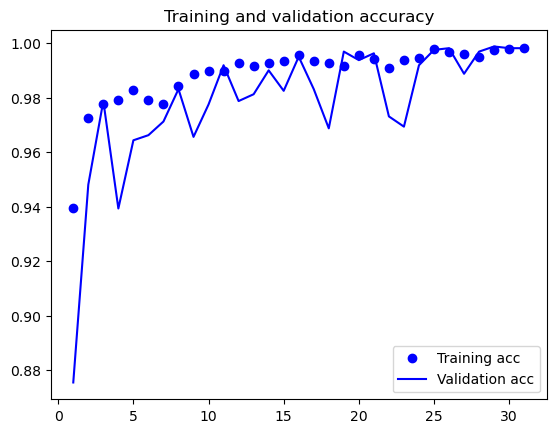

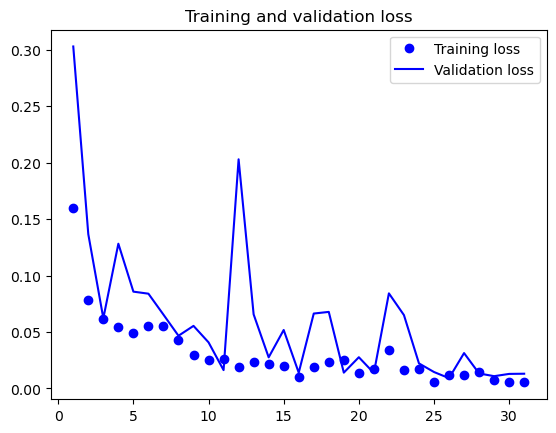

In [86]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [87]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_test, y_predict_label))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1332
           1       1.00      0.99      1.00      1333

    accuracy                           1.00      2665
   macro avg       1.00      1.00      1.00      2665
weighted avg       1.00      1.00      1.00      2665



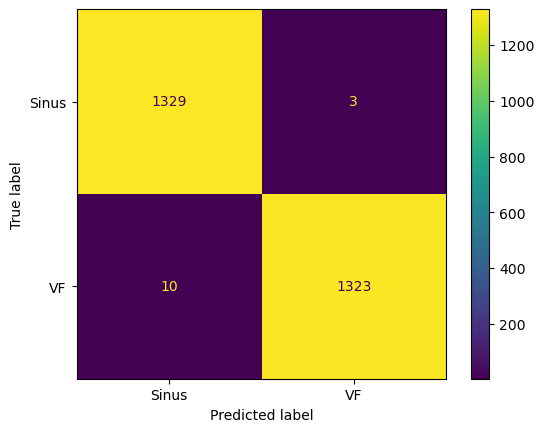

In [88]:
conf = confusion_matrix(y_test,y_predict_label)
cmdisplay = ConfusionMatrixDisplay(conf, display_labels=['Sinus','VF'])
cmdisplay.plot()
#plt.show()

In [60]:
tf.keras.utils.plot_model(cnn_transformer_model, to_file ='cnn_trasform.png', show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [80]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.
